In [56]:
import pandas as pd

raw_data = pd.read_csv('/content/diabetes_prediction_dataset.csv', sep=',')

In [57]:
raw_data.head(10000)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
9995,Female,9.0,0,0,never,25.28,5.8,130,0
9996,Male,59.0,0,0,ever,35.00,6.8,140,1
9997,Male,2.0,0,0,never,17.43,4.5,126,0
9998,Male,61.0,1,0,ever,31.89,5.7,140,0


In [58]:
raw_data['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [59]:
# Now since we need to know if the subjects are susceptible to diabetes or not, hence in case of classification we need to know if thedata is balanced or not.

raw_data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

Our Data is extremely unbalanced.

In [61]:
# Now we need to check the data types in each of the columns.

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [62]:
# We also need to check if there are any null values in our data set.

raw_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [63]:
# We now need to filter out the names of the categorical columns

raw_data.select_dtypes(include='object').columns

Index(['gender', 'smoking_history'], dtype='object')

In [64]:
# Fltering the numerical columns

raw_data.select_dtypes(exclude ='object').columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [65]:
# We now create the datasets for the targets and features.

targets = raw_data['diabetes']
features = raw_data.drop('diabetes', axis = 1)

In [69]:
# We will now encode categorical data and few of the processes of doing it are/
# One Hot Encoding
# Get Dummies from Pandas
# Label Encoding
# We also need to drop first to arrest variance inflation

transformed_features = pd.get_dummies(features, drop_first= True)

In [70]:
# Columns in transformed features set:

len(transformed_features.columns)

13

In [71]:
# Since we have categorical data in our dataset, we need to do MinMax Scaling.
# we will pre process the data on a scale from 0 to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(transformed_features)

In [72]:
df_scaled

array([[1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67467467, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34934935, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.82482482, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2992993 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.71221221, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
# Now splitting the dataset into train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scaled, targets, train_size=0.8, stratify = targets, random_state = 1234)

In [74]:
y_train.value_counts()

0    73200
1     6800
Name: diabetes, dtype: int64

In [75]:
y_test.value_counts()

0    18300
1     1700
Name: diabetes, dtype: int64

In [76]:
# Training Outputs(Targets known to the Machine for Training purpose)

len(y_train)

80000

In [77]:
# Training Features

len(x_train)

80000

In [78]:
# Test Features

len(x_test)

20000

In [79]:
# Test Outputs(Targets to be predicted/unknown to the machine)

len(y_test)

20000

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
temp_dict_1={}
for i in range(1,20):
  knn_model = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
  knn_model.fit(x_train,y_train)
  temp_dict_1[i]=accuracy_score(y_test, knn_model.predict(x_test))

In [80]:
temp_dict_1

{1: 0.946,
 2: 0.94685,
 3: 0.95565,
 4: 0.95755,
 5: 0.9588,
 6: 0.9605,
 7: 0.9603,
 8: 0.9599,
 9: 0.96025,
 10: 0.9608,
 11: 0.9602,
 12: 0.96075,
 13: 0.96035,
 14: 0.96025,
 15: 0.96045,
 16: 0.96065,
 17: 0.96075,
 18: 0.96085,
 19: 0.9605}

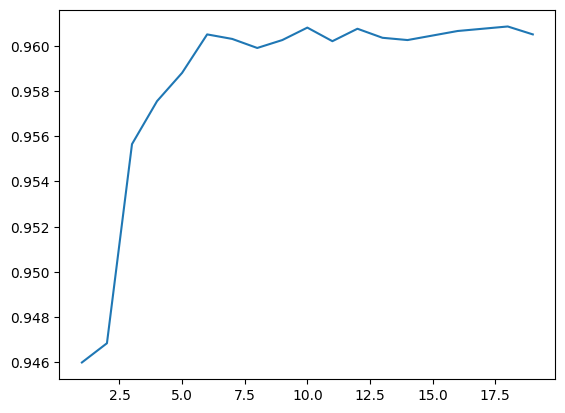

In [82]:
import matplotlib.pyplot as plt

plt.plot(temp_dict_1.keys(),temp_dict_1.values())
plt.show()

In [83]:
# Training our model with the best set of parameters

knn_model = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

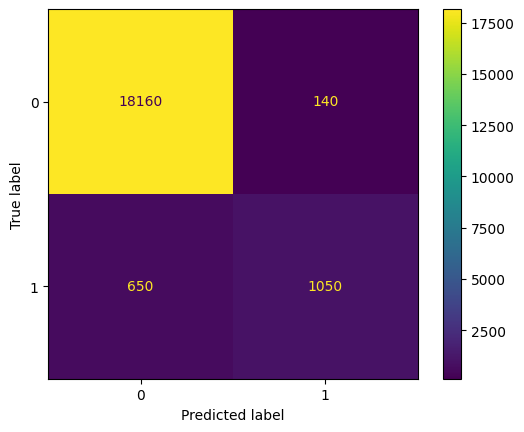

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test,knn_model.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn_model.classes_).plot()


In [85]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [86]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9605


In [87]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8824


In [88]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6176


In [89]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0077


In [90]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9923


In [91]:
false_negative_rate = FN / float(FN + TP)


print('False Negative Rate : {0:0.4f}'.format(false_negative_rate))

False Negative Rate : 0.3824


NOW APPLYING DECISION TREE CLASSIFIER ON THE SAME DATASET

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {'criterion':['gini', 'entropy'], 'max_depth':list(np.arange(4,9)), 'max_features':['auto', 'sqrt', 'log2']}
dt = DecisionTreeClassifier()

g_search =  GridSearchCV(estimator = dt, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 5, return_train_score= True)

g_search.fit(x_train, y_train)
g_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}

In [93]:
g_search.best_score_

0.9704

In [94]:
# now will instantiate a new model using the best parameters we got
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features =  'auto')
dt.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=6, max_features='auto')

In [95]:
accuracy_score(y_test, dt.predict(x_test))

0.97095

After Oversampling

In [53]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 6800
Before OverSampling, counts of label '0': 73200 

After OverSampling, the shape of train_X: (146400, 13)
After OverSampling, the shape of train_y: (146400,) 

After OverSampling, counts of label '1': 73200
After OverSampling, counts of label '0': 73200


In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
temp_dict={}
for i in range(1,20):
  knn_model_2 = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
  knn_model_2.fit(x_train_res,y_train_res)
  temp_dict[i]=accuracy_score(y_test, knn_model_2.predict(x_test))

In [97]:
temp_dict

{1: 0.92925,
 2: 0.9296,
 3: 0.92105,
 4: 0.92235,
 5: 0.91685,
 6: 0.9173,
 7: 0.9127,
 8: 0.9122,
 9: 0.9092,
 10: 0.90925,
 11: 0.9076,
 12: 0.9067,
 13: 0.905,
 14: 0.90385,
 15: 0.9036,
 16: 0.9024,
 17: 0.90095,
 18: 0.90035,
 19: 0.9}

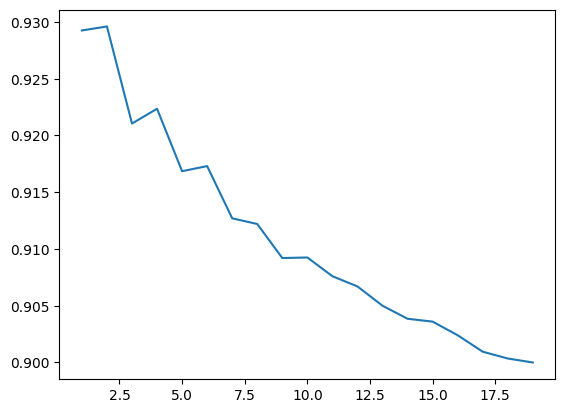

In [98]:
import matplotlib.pyplot as plt

plt.plot(temp_dict.keys(),temp_dict.values())
plt.show()

In [99]:
# Training our model with the best set of parameters

knn_model_2 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_model_2.fit(x_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3, weights='distance')

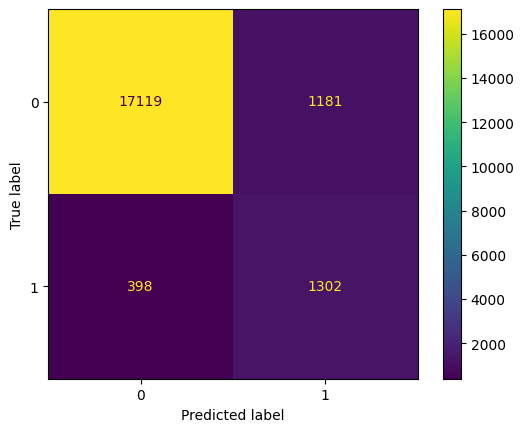

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm2=confusion_matrix(y_test,knn_model_2.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels=knn_model_2.classes_).plot()

In [102]:
TN2 = cm2[0,0]
TP2 = cm2[1,1]
FP2 = cm2[0,1]
FN2 = cm2[1,0]

In [103]:
# print classification accuracy

classification_accuracy2 = (TP2 + TN2) / float(TP2 + TN2 + FP2 + FN2)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy2))

Classification accuracy : 0.9211


In [104]:
# print precision score

precision2 = TP2 / float(TP2 + FP2)


print('Precision : {0:0.4f}'.format(precision2))

Precision : 0.5244


In [105]:
recall2 = TP2 / float(TP2 + FN2)

print('Recall or Sensitivity : {0:0.4f}'.format(recall2))

Recall or Sensitivity : 0.7659


In [106]:
false_positive_rate2 = FP2 / float(FP2 + TN2)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate2))

False Positive Rate : 0.0645


In [107]:
specificity2 = TN2 / (TN2 + FP2)

print('Specificity : {0:0.4f}'.format(specificity2))

Specificity : 0.9355


In [108]:
false_negative_rate2 = FN2 / float(FN2 + TP2)


print('False Negative Rate : {0:0.4f}'.format(false_negative_rate2))

False Negative Rate : 0.2341


After Oversampling, Applying Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
params2 = {'criterion':['gini', 'entropy'], 'max_depth':list(np.arange(4,9)), 'max_features':['auto', 'sqrt', 'log2']}
dt2 = DecisionTreeClassifier()

g_search2 =  GridSearchCV(estimator = dt2, param_grid = params2, scoring = 'accuracy', n_jobs = -1, cv = 5, return_train_score= True)

g_search2.fit(x_train_res, y_train_res)
g_search2.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [113]:
g_search2.best_score_

0.8886202185792349

In [116]:
# now will instantiate a new model using the best parameters we got
dt2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, max_features =  'log2')
dt2.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=8, max_features='log2')

In [117]:
accuracy_score(y_test, dt2.predict(x_test))

0.9314